In [1]:
# Importing Libraries
import ast
import seaborn as sns
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\PRASHANT BANSFORE\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Feb 10 13:34:57 2025).


Filter for US jobs only

In [2]:
df_US=df[df['job_country']=="United States"]

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


Explode job_skills column to count the demanding skills

In [3]:
df_skills=df_US.explode('job_skills')

df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [4]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count= df_skills_count.reset_index(name='skill_count')         #convert the series into dataframe

df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


Top 3 Job roles

In [5]:
job_titles=df_skills_count['job_title_short'].unique().tolist()

Top_3_titles=sorted(job_titles[0:3])      #sorted() to sort in alphabetical order

Top_3_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

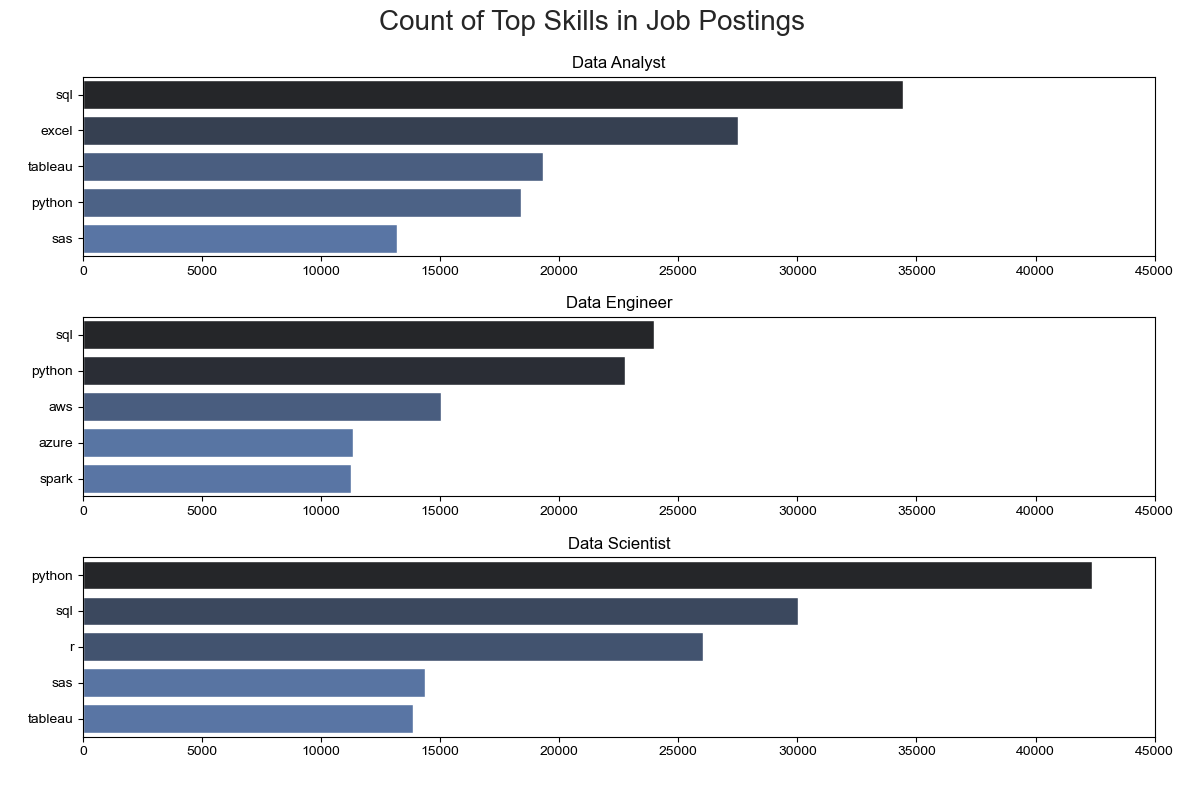

In [6]:
fig,ax=plt.subplots(len(Top_3_titles),1,figsize=(12,8))
sns.set_theme(style='ticks')
for i,titles in enumerate(Top_3_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==titles].head(5)
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(titles)
    ax[i].set_ylabel(" ")
    ax[i].set_xlabel(" ")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,45000)

fig.suptitle("Count of Top Skills in Job Postings",fontsize=20)
fig.tight_layout(h_pad=0.05)  #to fix the overlap
plt.show()

Skill Percentage

In [7]:
df_job_title_count=df_US['job_title_short'].value_counts()

df_job_title_count=df_job_title_count.reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [8]:
df_skills_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')        #left join so we can see data as per the df_skils_count

df_skills_perc['skills_percent']=df_skills_perc['skill_count']/df_skills_perc['jobs_total'] * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


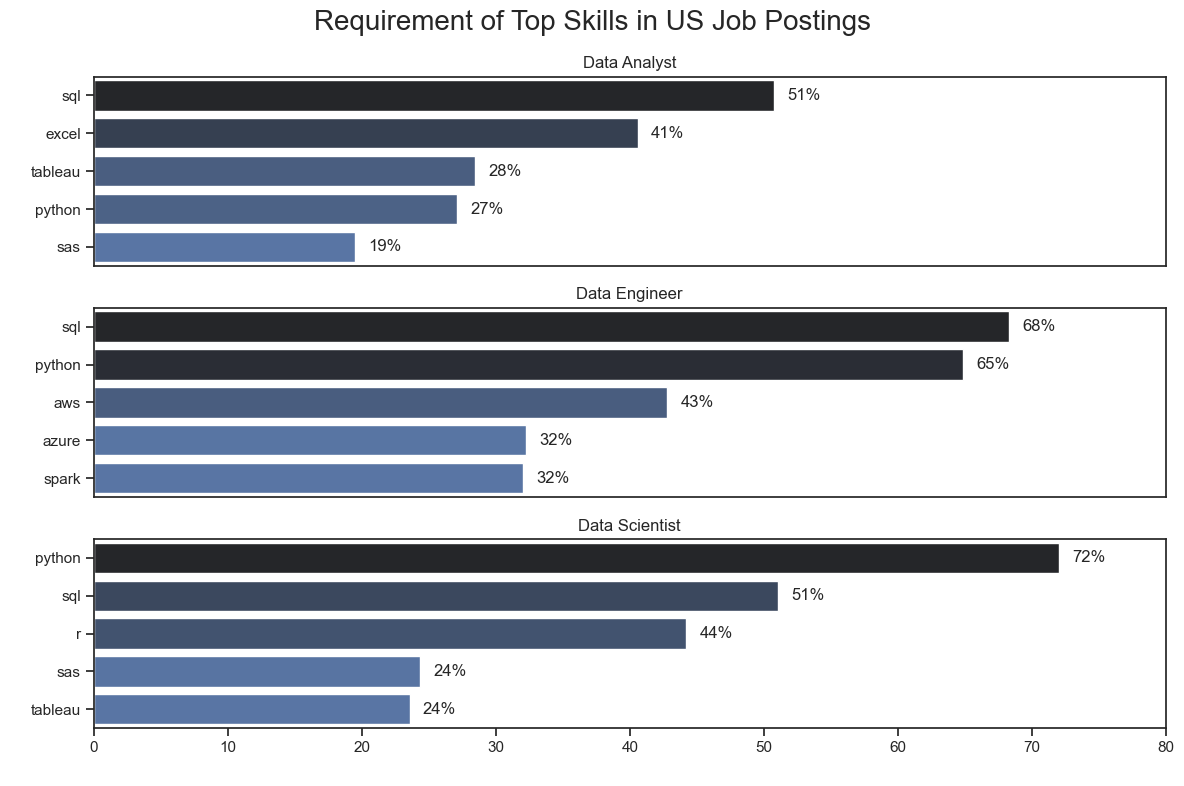

In [9]:
fig,ax=plt.subplots(len(Top_3_titles),1,figsize=(12,8))
sns.set_theme(style='ticks')
for i,titles in enumerate(Top_3_titles):
    df_plot=df_skills_perc[df_skills_perc['job_title_short']==titles].head(5)
    sns.barplot(data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(titles)
    ax[i].set_ylabel(" ")
    ax[i].set_xlabel(" ")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)

    for n,perc in enumerate(df_plot['skills_percent']):
        ax[i].text(perc + 1, n, f'{perc:.0f}%', va='center')

    if i!=len(Top_3_titles)-1:  # 3-1=2....for the third position(row) chart
     ax[i].set_xticks([])
fig.suptitle("Requirement of Top Skills in US Job Postings",fontsize=20)
fig.tight_layout(h_pad=0.05)  #to fix the overlap
plt.show()